## **AIVLE School 미니프로젝트 8기 AI트랙 1차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---

## [step 3] 모델링

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여,
미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여
미세먼지 농도를 예측하는 머신러닝 모델 구현


### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2024.csv : 2024년 미세먼지 데이터
    * weather_2024.csv : 2024년 날씨 데이터
* 테스트 데이터
    * air_2025.csv : 2025년 미세먼지 데이터
    * weather_2025.csv : 2025년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_202x)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 프로젝트 폴더를 준비하고 데이터를 로딩하시오.
        * 구글코랩
            * 구글 드라이브에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
        * (필요시) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 구글 코랩 (또는 필요시 로컬)를 사용하시면 됩니다.

#### 1) 구글 코랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/project/'

#### 1) (희망시) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'
path = './weghit/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [43]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import joblib

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
<small>(해결되지 않는다면 아래 Colab 한글 깨짐 현상 해결법 참고)<br>https://developnote.tistory.com/165#google_vignette </small>

In [3]:
# (Jupyter) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [ ]:
# (Colab) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
!apt -qq -y install fonts-nanum > /dev/null
!rm -rf ~/.cache/matplotlib

import matplotlib as mpl
import matplotlib.font_manager as fm
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 미세먼지 및 날씨 데이터 : train_x.csv / train_y.csv / test_x.csv / test_y.csv

#### 1) 데이터 로딩

In [12]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
X_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv')
X_test  = pd.read_csv('test_x.csv')
y_test  = pd.read_csv('test_y.csv')

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8759, 28)
y_train shape: (8759, 1)
X_test shape: (2855, 28)
y_test shape: (2855, 1)


#### 2) 기본 정보 조회
* 로딩한 데이터의 기본 정보를 확인 합니다

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("=== X_train info ===")
X_train.info()
print("\n=== y_train info ===")
y_train.info()
print("\n=== X_test info ===")
X_test.info()
print("\n=== y_test info ===")
y_test.info()

print("\n=== X_train describe ===")
print(X_train.describe())
print("\n=== y_train describe ===")
print(y_train.describe())
print("\n=== X_test describe ===")
print(X_test.describe())
print("\n=== y_test describe ===")
print(y_test.describe())


=== X_train info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8759 non-null   float64
 1   CO             8759 non-null   float64
 2   O3             8759 non-null   float64
 3   NO2            8759 non-null   float64
 4   PM10           8759 non-null   float64
 5   PM25           8759 non-null   float64
 6   기온(°C)         8759 non-null   float64
 7   강수량(mm)        8759 non-null   float64
 8   풍속(m/s)        8759 non-null   float64
 9   풍향(16방위)       8759 non-null   float64
 10  습도(%)          8759 non-null   int64  
 11  증기압(hPa)       8759 non-null   float64
 12  이슬점온도(°C)      8759 non-null   float64
 13  현지기압(hPa)      8759 non-null   float64
 14  해면기압(hPa)      8759 non-null   float64
 15  적설(cm)         8759 non-null   float64
 16  전운량(10분위)      8759 non-null   int64  
 17  중하층운량(10분위)    8759 non-null   

## **2.머신러닝 모델링**

### (1) 모델링: LinearRegression

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [7]:
# LinearRegression 코드를 작성하세요.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
X_test.isnull().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
month            0
day              0
hour             0
PM10_lag1        0
dtype: int64

In [13]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = lr_model.predict(X_test)

In [14]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
mse = mean_squared_error(y_test, y_pred_LR)
r2  = r2_score(y_test, y_pred_LR)

print(f"Test MSE: {mse:.5f}")
print(f"Test R2 : {r2:.5f}")

Test MSE: 51.33462
Test R2 : 0.93213


In [20]:
# 학습한 모델을 pkl 파일로 저장해보세요.
file_name = 'linear_regression_model.pkl'
joblib.dump(lr_model, path + file_name)
print(f"모델이 '{file_name}'로 저장되었습니다.")

모델이 'linear_regression_model.pkl'로 저장되었습니다.


### (2) 모델링: RandomForest

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [22]:
# 랜덤포레스트로 모델 학습 진행하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R2 Score
rf_model = RandomForestRegressor(
    n_estimators=100,  # 트리 수
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [24]:
# predict로 예측하여 y_pred_rf에 저장해보세요.
y_pred_RF = rf_model.predict(X_test)

In [25]:
# test_y 데이터와 y_pred_RF 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
mse = mean_squared_error(y_test, y_pred_RF)
r2  = r2_score(y_test, y_pred_RF)

print(f"Test MSE: {mse:.5f}")
print(f"Test R2 : {r2:.5f}")

Test MSE: 59.88414
Test R2 : 0.92082


In [23]:
# 학습한 모델을 pkl 파일로 저장해보세요.
file_name = 'random_forest_regressor.pkl'
joblib.dump(rf_model, path + file_name)
print(f"모델이 '{file_name}'로 저장되었습니다.")

모델이 'random_forest_regressor.pkl'로 저장되었습니다.


### (2-1) 랜덤포레스트 feature_importances 확인
* 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.

In [26]:
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# 학습된 rf_model 사용
importances = rf_model.feature_importances_

# 컬럼 이름과 함께 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

          feature  importance
4            PM10    0.930968
26           hour    0.013857
18        시정(10m)    0.006448
19       지면온도(°C)    0.004717
27      PM10_lag1    0.003636
9        풍향(16방위)    0.003264
3             NO2    0.003201
1              CO    0.003055
10          습도(%)    0.002962
6          기온(°C)    0.002912
2              O3    0.002749
8         풍속(m/s)    0.002585
5            PM25    0.002472
0             SO2    0.002126
25            day    0.001799
13      현지기압(hPa)    0.001624
14      해면기압(hPa)    0.001571
17    중하층운량(10분위)    0.001313
12      이슬점온도(°C)    0.001167
16      전운량(10분위)    0.001162
21  10cm 지중온도(°C)    0.001140
22  20cm 지중온도(°C)    0.001075
11       증기압(hPa)    0.000991
20   5cm 지중온도(°C)    0.000988
23  30cm 지중온도(°C)    0.000927
24          month    0.000646
7         강수량(mm)    0.000544
15         적설(cm)    0.000100


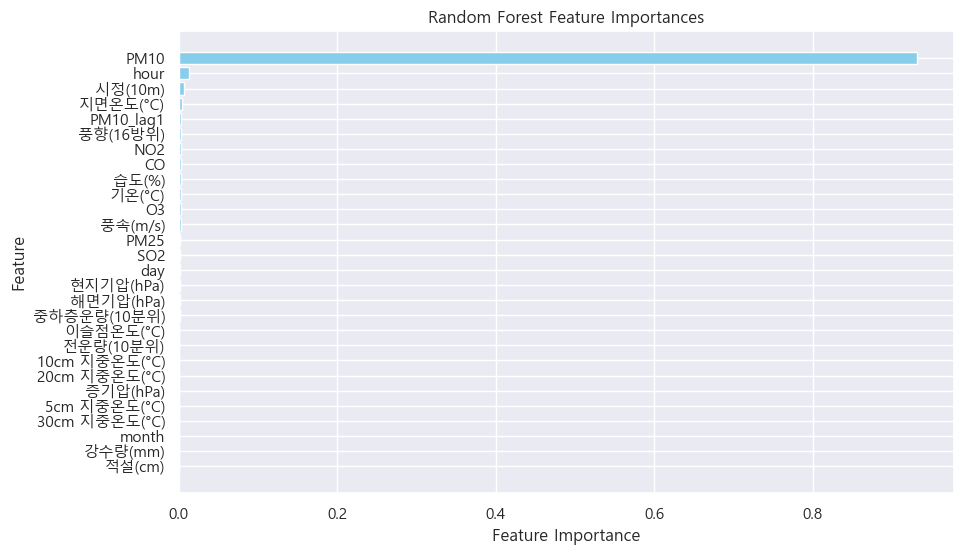

In [28]:
# feature_importances 시각화
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 확인 후 알 수 있었던 인사이트가 있었으면 정리해보세요!

1. 현재의 PM10 값 자체가 다음 시점 예측에서 가장 중요

2. 시간대(hour)만 약간 영향

3. 기상/대기환경 변수들은 상대적으로 영향력이 낮음

4. feature 선택/차원 축소 시 PM10,hour, 시정, 지면온도, PM10_lag1제외 영향 거의 X

### (3) 모델링: GradientBoosting

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [35]:
# 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R2 Score
gb_model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [37]:
y_pred_test  = gb_model.predict(X_test)

In [38]:
mse_test  = mean_squared_error(y_test, y_pred_test)
r2_test   = r2_score(y_test, y_pred_test)

In [39]:
print(f"Test MSE: {mse:.5f}")
print(f"Test R2 : {r2:.5f}")

Test MSE: 59.88414
Test R2 : 0.92082


In [40]:
# 학습한 모델을 파일로 저장해보세요.
file_name = 'gradient_boosting.pkl'
joblib.dump(rf_model, path + file_name)
print(f"모델이 '{file_name}'로 저장되었습니다.")

모델이 'gradient_boosting.pkl'로 저장되었습니다.


### (3-1) 그라디언트부스팅 feature_importances 확인
* 학습한 모델의 feature_importances를 구해보세요.

In [41]:
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 결과 확인
print(feature_importances)

          feature  importance
4            PM10    0.961452
26           hour    0.023403
6          기온(°C)    0.004318
1              CO    0.002253
5            PM25    0.001628
9        풍향(16방위)    0.001276
2              O3    0.000818
18        시정(10m)    0.000675
27      PM10_lag1    0.000631
3             NO2    0.000501
8         풍속(m/s)    0.000463
16      전운량(10분위)    0.000446
12      이슬점온도(°C)    0.000303
13      현지기압(hPa)    0.000244
10          습도(%)    0.000216
0             SO2    0.000215
22  20cm 지중온도(°C)    0.000195
23  30cm 지중온도(°C)    0.000183
19       지면온도(°C)    0.000174
24          month    0.000159
7         강수량(mm)    0.000140
17    중하층운량(10분위)    0.000108
20   5cm 지중온도(°C)    0.000060
11       증기압(hPa)    0.000045
25            day    0.000036
14      해면기압(hPa)    0.000033
21  10cm 지중온도(°C)    0.000026
15         적설(cm)    0.000000


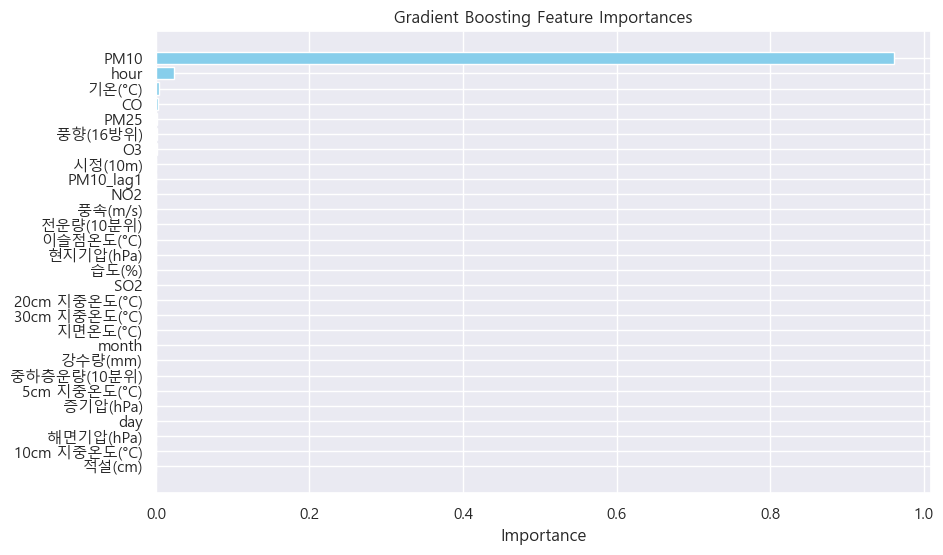

In [42]:
# feature_importances 시각화
plt.figure(figsize=(10,6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 정렬
plt.show()

### (4) 모델링: Self Choice Model

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [44]:
# 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# (예시)xgboost 등
xgb_model = XGBRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print(f"Test MSE: {mse:.5f}")
print(f"Test R2 : {r2:.5f}")

Test MSE: 59.17636
Test R2 : 0.92176


In [47]:
# 학습한 모델을 파일로 저장해보세요.
file_name = 'xgboost.pkl'
joblib.dump(rf_model, path + file_name)
print(f"모델이 '{file_name}'로 저장되었습니다.")

모델이 'xgboost.pkl'로 저장되었습니다.


In [48]:
# (다음 진행은 선택입니다)
# self choice model로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인 및 시각화
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

          feature  importance
4            PM10    0.842661
26           hour    0.037985
6          기온(°C)    0.010989
9        풍향(16방위)    0.006346
21  10cm 지중온도(°C)    0.006186
16      전운량(10분위)    0.006153
1              CO    0.006122
10          습도(%)    0.006007
18        시정(10m)    0.005735
5            PM25    0.005047
8         풍속(m/s)    0.004636
25            day    0.004600
19       지면온도(°C)    0.004476
23  30cm 지중온도(°C)    0.004445
13      현지기압(hPa)    0.004441
14      해면기압(hPa)    0.004308
2              O3    0.004025
24          month    0.004004
20   5cm 지중온도(°C)    0.003905
27      PM10_lag1    0.003799
12      이슬점온도(°C)    0.003673
7         강수량(mm)    0.003555
17    중하층운량(10분위)    0.003540
11       증기압(hPa)    0.003454
3             NO2    0.003435
22  20cm 지중온도(°C)    0.003354
0             SO2    0.002173
15         적설(cm)    0.000947


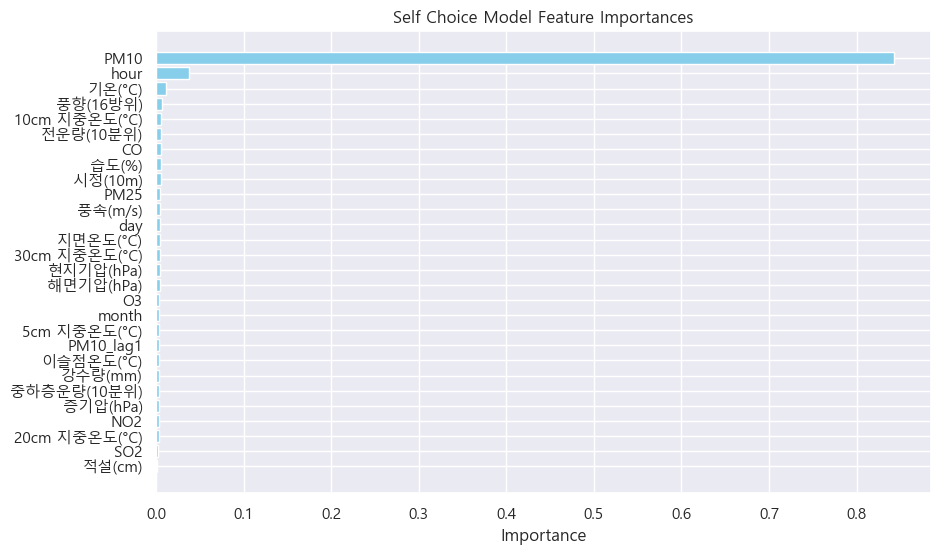

In [49]:
plt.figure(figsize=(10,6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Self Choice Model Feature Importances')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 정렬
plt.show()

# 고생하셨습니다👍👍